In [1]:
# Importing Libraries

import requests
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup

<span style="color:#a569bd; font-size:32px; font-weight:bold; font-family:'Times New Roman';">
𝟭. Scraping of Data form RBI Website
</span>


In [2]:
# Variables for time range

input_start_date = "2023-01-01"
input_end_date = "2025-01-01"

start_date = datetime.strptime(input_start_date , "%Y-%m-%d")
end_date = datetime.strptime(input_end_date , "%Y-%m-%d")

FromDate = start_date.strftime("%d%%2F%m%%2F%Y")
ToDate = end_date.strftime("%d%%2F%m%%2F%Y")

In [3]:
# To get the response

url = "https://m.rbi.org.in//scripts/referenceratearchive.aspx"
payload = f"__EVENTTARGET=&__EVENTARGUMENT=&__VIEWSTATE=%2FwEPDwULLTExMzg1NzgxMzdkGAEFHl9fQ29udHJvbHNSZXF1aXJlUG9zdEJhY2tLZXlfXxYFBQZjaGtBbGwFBmNoa0dCUAUGY2hrWUVOBQZjaGtVU0QFB2Noa0VVUk%2FixMZhrP%2B8%2BhZ7jpRw%2B66RlhkejDIRXQM45kL%2Bol%2BmkQ%3D%3D&__VIEWSTATEGENERATOR=6A117BB1&__EVENTVALIDATION=%2FwEdABLkHYwjj%2F9G8k1DT%2FNWYzaOi6wX7g7V%2B51d5y%2FuZ409MWQ6cu1iZ73N7YF2NPAmCyQ%2Fq33cCQLgaFQSElESF1pcfcX9ZaEV78oETjPwNTvjRyaLpyghhgB3dOM81YQT2c9%2F%2BgftA0sfXfDVAjh7xSqBhaW9lcSH1kY5FCWz6Xgykl1T0rRV1xwZiwEqKxacpKD8aEimM%2Bv26W4ZAE5GN0Z6WPN56Qs62BAJnF597e6LXUPcYsL56nHH9LNw6EJeV0k6GX39ewFFXMEeUx5%2B6kZrPOaW1pQztoQA36D1w%2F%2BbXfeorZxJNEQSFMcpSqWnvJqqdQaphId%2BsWamqy7n6Z4oel%2Bn7jNr4sA%2B1mnkrnIDxN0LvXi%2FlgMleTl7BWL53k8nn%2FbE02MAJCiw9BeoocghoNQGtl5nzPaEn7Mm0CIpTw%3D%3D&UsrFontCntr%24txtSearch=&chkAll=on&txtFromDate={FromDate}&txtToDate={ToDate}&btnSubmit=%20GO%20"

headers = {
  'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7',
  'Accept-Language': 'en-GB,en-US;q=0.9,en;q=0.8',
  'Cache-Control': 'max-age=0',
  'Connection': 'keep-alive',
  'Content-Type': 'application/x-www-form-urlencoded',
  'Origin': 'https://m.rbi.org.in',
  'Referer': 'https://m.rbi.org.in//scripts/referenceratearchive.aspx',
  'Sec-Fetch-Dest': 'document',
  'Sec-Fetch-Mode': 'navigate',
  'Sec-Fetch-Site': 'same-origin',
  'Sec-Fetch-User': '?1',
  'Upgrade-Insecure-Requests': '1',
  'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/133.0.0.0 Safari/537.36',
  'sec-ch-ua': '"Not(A:Brand";v="99", "Google Chrome";v="133", "Chromium";v="133"',
  'sec-ch-ua-mobile': '?0',
  'sec-ch-ua-platform': '"macOS"',
  'Cookie': 'f5_cspm=1234; ASP.NET_SessionId=23w2yuc2tnsmmxgsgzyg2q3f; IncPath=Includes1; BIGipServerPool-RBI-website=84939948.20480.0000; _ga=GA1.3.378118764.1740891503; _gid=GA1.3.160776972.1740891503; _ga_4PNES72PS5=GS1.3.1740891503.1.0.1740891503.0.0.0; TS0194b248=01af0247247f5993dddd609f38084e2e26493d71cf25da9adb43512da32ae25959fb19ab0a28f4087b46b21f3f694dd9596952f783186b0bf3c036457a48b2dcd1f9445269ca0d3fc365b9ac966c42ac189f8ceba1754ab28945d55b7081b324ccf7c8c6d27c15f30ff7f1a40bf42e141f120ddabe7df8eb486ed2211cf6e828e541777a9a; TSPD_101=0874148b5fab280013f576f09ff493bdc6ede19d63ba8b51af86f9573c6fc4878e30c33c0aa35a03f29b1cd38c67caa00852108681051800465eed4c573c2d4913a758d1ad88a951d9a915b5c8395a29; TSa07da9d1077=0874148b5fab2800d28a9a140da3b0ec171911e95a331b640edb4ede84ee9a2b72df9ed0d0a1289f96881935bab5390a08da3ab3cd172000bb3810a40c7aa06852f4efae6888ece1457fce02095d5d3606837f955a3dd2e5; TS71c5c044027=0874148b5fab2000004ce3e013575292659f32e7af9033a11be479d2cbc4967ef649c3c745d7c0e4085bfbd7221130006b386dffac055a62ef56db34e8ebbcc9117d164d6c78e4b5a778071af491364e34823e1e41112dd438d2af57cc777e85; f5_cspm=1234; TS0194b248=01af024724b9f2290d4a005dc38b09c25c88ba65ea799c4ff632610d6f60f5c892c0458e383c95d89112e17428435fac1bdfdefa77fbd90775e30a3fa59f686e0131b61dd695e204d1d523ceac7d60e8162f24f0602a66c36c6de88143d7d85951d8f69be6c26f233e2cbcb61273520e6f08261bea49bf0f953dd526ab3b584c37818b2aed; TS71c5c044027=0874148b5fab20009ec04bcd08df7b1329f19e38b2674c2e02c8c50520040980635c9fdd72ae930608664080b91130004ad7fef0eafa572c599a093b330d3164efcb61f379bd58ca93470726ae18898f1f121dd1d1811938e2d5efe3969a3022; TSa07da9d1029=0874148b5fab2800f9cfd99e2a116a375468846a1e8c80972f430871e965932c7b624a19e14dbd9b58a848b4ba195df7'
}

response = requests.request("POST", url, headers=headers, data=payload)

In [4]:
# To extract the table from html response

if response.status_code == 200:
    soup = BeautifulSoup(response.content, "html.parser")
    tables = soup.find_all("table")
    table_data = []

    for table in tables:
        rows = table.find_all("tr")
        for row in rows:
            cells = row.find_all("td")
            row_data = [cell.get_text(strip=True) for cell in cells]
            table_data.append(row_data)

In [5]:
df_rbi = pd.DataFrame(table_data)

In [6]:
df_rbi.head(6)

,0,1,2,3,4
0,Search Reference Rate,None,None,None,None
1,Select the Option,AllGBPYENUSDEURO,None,None,None
2,From Date,,To date,,
3,Download to:Excel,None,None,None,None
4,Date,USD,GBP,EURO,YEN
5,01/01/2025,85.7090,107.2631,88.7597,54.5100


<span style="color:#a569bd; font-size:32px; font-weight:bold; font-family:'Times New Roman';">
𝟮. Cleaning the Data
</span>

In [7]:
df_rbi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       488 non-null    object
 1   1       486 non-null    object
 2   2       485 non-null    object
 3   3       485 non-null    object
 4   4       485 non-null    object
dtypes: object(5)
memory usage: 19.2+ KB


In [8]:
# To get proper Column name and clean dataset

row_idx = df_rbi[df_rbi.iloc[:, 0] == "Date"].index
if not row_idx.empty:
    row_idx = row_idx[0]  
    df_rbi.columns = df_rbi.iloc[row_idx]  
    df_rbi = df_rbi.iloc[row_idx + 1:].reset_index(drop=True) 

In [9]:
# To fill up dates with no data

df_rbi["Date"] = pd.to_datetime(df_rbi["Date"], format="%d/%m/%Y")
full_date_range = pd.date_range(start=df_rbi["Date"].min(), end=df_rbi["Date"].max())
df_rbi = df_rbi.set_index("Date").reindex(full_date_range).rename_axis("Date")
df_rbi.ffill(inplace=True)

df_rbi = df_rbi.reset_index().rename(columns={"index": "Date"})

In [10]:
# To convert from object to float 
df_rbi['USD'] = pd.to_numeric(df_rbi["USD"], errors="coerce")
df_rbi['GBP'] = pd.to_numeric(df_rbi["GBP"], errors="coerce")
df_rbi['EURO'] = pd.to_numeric(df_rbi["EURO"], errors="coerce")
df_rbi['YEN'] = pd.to_numeric(df_rbi["YEN"], errors="coerce")

# To change conversion rate from 100 YEN to 1 YEN ( Already in 1 USD , 1 GBP and 1 EURO )
df_rbi['YEN'] = df_rbi['YEN']/100

<span style="color:#a569bd; font-size:32px; font-weight:bold; font-family:'Times New Roman';">
𝟯. Trend of the Currencies over the Years
</span>

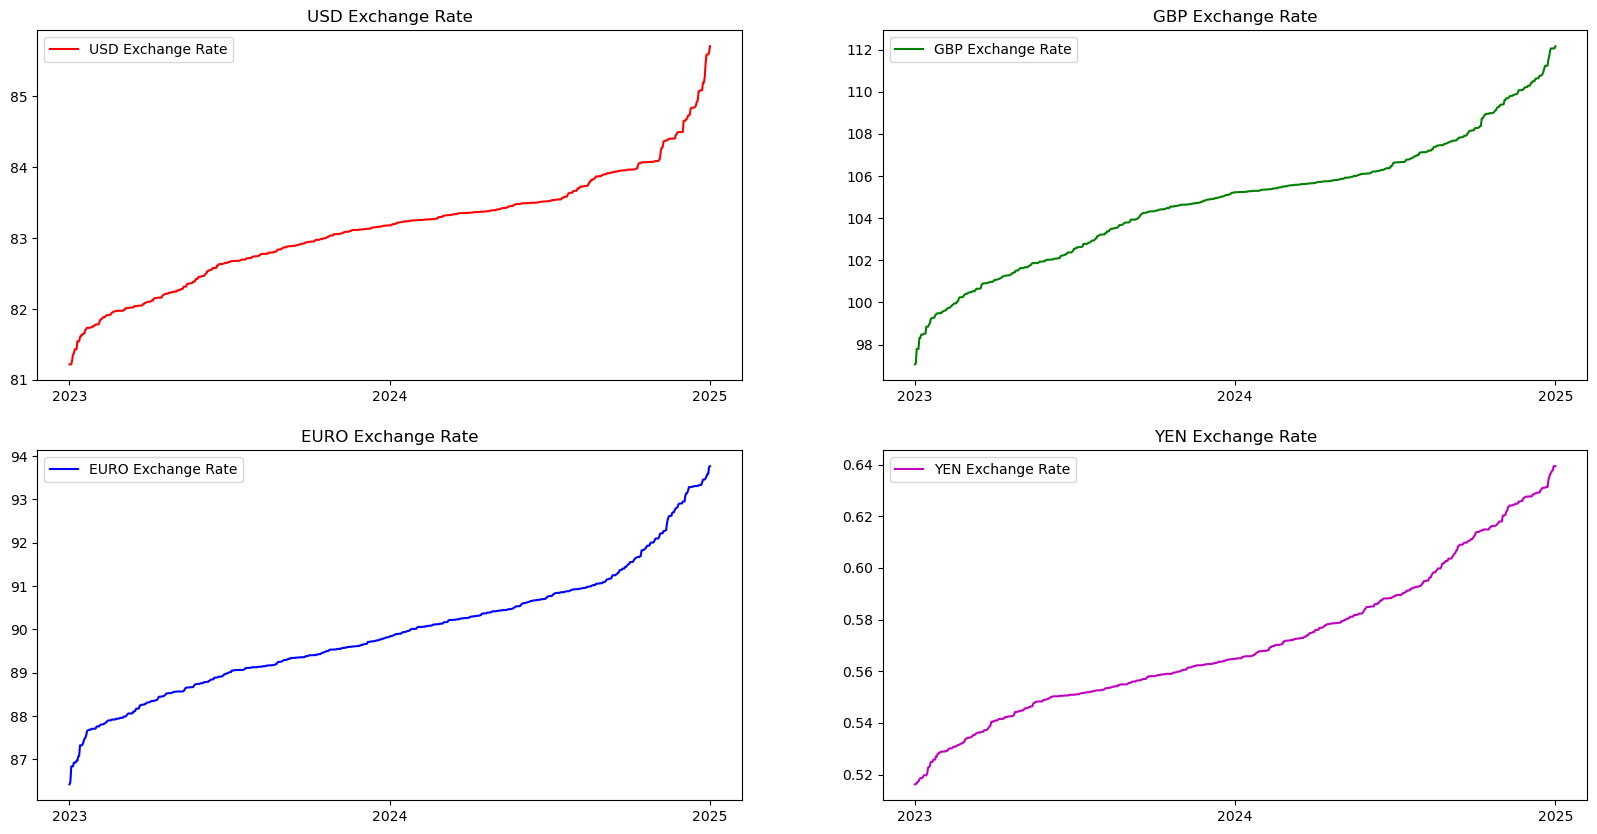

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
yearly_ticks = df_rbi["Date"][::365]

# Plot on each subplot
axes[0, 0].plot(df_rbi["Date"], df_rbi["USD"].sort_values(), label="USD Exchange Rate", color="r")
axes[0, 0].set_xticks(yearly_ticks)
axes[0, 0].set_xticklabels(yearly_ticks.dt.strftime("%Y"), fontsize=10)
axes[0, 0].set_title("USD Exchange Rate")
axes[0, 0].legend()

axes[0, 1].plot(df_rbi["Date"], df_rbi["GBP"].sort_values(), label="GBP Exchange Rate", color="g")
axes[0, 1].set_xticks(yearly_ticks)
axes[0, 1].set_xticklabels(yearly_ticks.dt.strftime("%Y"), fontsize=10)
axes[0, 1].set_title("GBP Exchange Rate")
axes[0, 1].legend()

axes[1, 0].plot(df_rbi["Date"], df_rbi["EURO"].sort_values(), label="EURO Exchange Rate", color="b")
axes[1, 0].set_xticks(yearly_ticks)
axes[1, 0].set_xticklabels(yearly_ticks.dt.strftime("%Y"), fontsize=10)
axes[1, 0].set_title("EURO Exchange Rate")
axes[1, 0].legend()

axes[1, 1].plot(df_rbi["Date"], df_rbi["YEN"].sort_values(), label="YEN Exchange Rate", color="m")
axes[1, 1].set_xticks(yearly_ticks)
axes[1, 1].set_xticklabels(yearly_ticks.dt.strftime("%Y"), fontsize=10)
axes[1, 1].set_title("YEN Exchange Rate")
axes[1, 1].legend()

plt.show()

<span style="color:#ff8c00; font-size:15px">
• The graph indicates that the Indian currency has depreciated over the past two years against major currencies: <br>
• USD: from 81 to 87 (~7.4% depreciation) <br>
• EUR: from 85 to 93 (~9.4% depreciation) <br>
• GBP: from 90 to 110 (~22.2% depreciation) <br>
• YEN: from 0.50 to 0.60 (~20% depreciation)    
</span>

<span style="color:#a569bd; font-size:32px; font-weight:bold; font-family:'Times New Roman';">
𝟰. Compare distributions among currencies
</span>

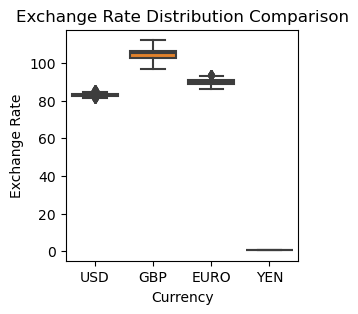

In [12]:
plt.figure(figsize=(3, 3))
sns.boxplot(data=df_rbi)
plt.xlabel("Currency")
plt.ylabel("Exchange Rate")
plt.title("Exchange Rate Distribution Comparison")
plt.show()

<span style="color:#ff8c00; font-size:15px">
1. USD (US Dollar) <br>
• The exchange rate for USD is relatively stable with a small variation over time. <br>
• There are no major outliers, suggesting that the exchange rate has been consistent. <br>
2. GBP (British Pound) <br>
• GBP has the widest spread (IQR) among all currencies, indicating high fluctuation in exchange rates. <br>
• The median exchange rate is higher than USD and EURO, with a visible upper whisker showing higher exchange rate spikes. <br>
3. EURO (Euro) <br>
• The EURO shows moderate variation, with an IQR slightly smaller than GBP. <br>
• The exchange rate distribution is tighter compared to GBP but more spread out than USD. <br>
4. YEN (Japanese Yen) <br>
• The exchange rate for YEN is significantly lower than the other three currencies. <br>
• The IQR is extremely small, meaning low variation in exchange rates. <br>
• The box plot is almost flat, indicating very little change over time. <br>   
</span>